# Multiway MGC K-sample test

We run a 2-way MGC k-sample test to determine independence between groups.

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=1)
PALETTE = sns.color_palette("Set1")

from hyppo.independence import MGC
from hyppo.ksample._utils import k_sample_transform

import sys; sys.path.append('../')
from src.tools.utils import get_files, get_latents

%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=2)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[3:])

In [12]:
## Define paths
#base_dir = Path('/mnt/ssd3/ronan/data/gcca_05-17-18:27_max_rank-ZG2/')
base_dir = Path('/mnt/ssd3/ronan/data/gcca_old_min_rank-ZG3/')

In [16]:
groups, labels = get_latents(base_dir, flag='_gcca-zg')

In [17]:
ways = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]

In [18]:
X,Y = k_sample_transform(groups, ways=ways)

In [19]:
X = X[:,:,:3].reshape(X.shape[0],-1)

In [20]:
stat, pvalue, mgc_dict = MGC().test(X, Y, workers=-1)

In [21]:
pvalue

0.014

Optimal Scale: [228, 3]


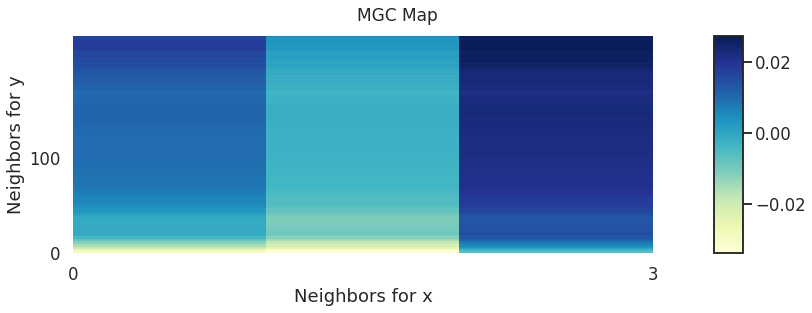

In [95]:
# store mgc outputs as variables
mgc_map = mgc_dict["mgc_map"]
opt_scale = mgc_dict["opt_scale"]

print("Optimal Scale:", opt_scale)
fig, (ax, cax) = plt.subplots(ncols=2, figsize=(12, 4),  gridspec_kw={"width_ratios":[1, 0.05]})

# draw heatmap and colorbar
ax = sns.heatmap(mgc_map, cmap="YlGnBu", ax=ax, cbar=False)
fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
ax.invert_yaxis()

# optimal scale
ax.scatter(opt_scale[0], opt_scale[1], marker='X', s=200, color='red')

# make plots look nice
fig.suptitle("MGC Map", fontsize=17)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlabel('Neighbors for x')
ax.set_ylabel('Neighbors for y')
ax.set_xticks([0, 3])
ax.set_yticks([0, 100])
ax.xaxis.set_tick_params()
ax.yaxis.set_tick_params()
cax.xaxis.set_tick_params()
cax.yaxis.set_tick_params()
plt.show()

The k-sample transform generates Y labels uses the euclidean distance. Let there be $K$ ways and two sets of sample labels $x,y \in Y$ that agree on $h \leq K$ of the ways. Then taking the euclidean distance we achieve
$$||x-y||_2 = \sqrt{2(K-h)}.$$
What we want, however, is simply $||x-y|| = K-h$. Whether this monotonic transformation has an effect, unknown. So, we manually construct the desired distances from the euclidean distances.

In [96]:
from sklearn.metrics.pairwise import euclidean_distances

In [97]:
X_dist = euclidean_distances(X,X)
Y_dist = (euclidean_distances(Y,Y)**2)/2

In [98]:
stat, pvalue, mgc_dict = MGC(compute_distance=None).test(X_dist, Y_dist,workers=-1)

In [99]:
pvalue

0.558